# git_learning 

# 2025_07_09

git init  初始化，

git status  检测当前目录下的文件的状态

红色：新增文件/未管理的文件   git add file_name

绿色: git 已经管理起来      git commit  -m "描述信息" ->> 生成版本

git log : 查看历史版本

git reset --hard 版本号： 回滚

git reflog : 查看历史操作

git config -h : 请求帮助

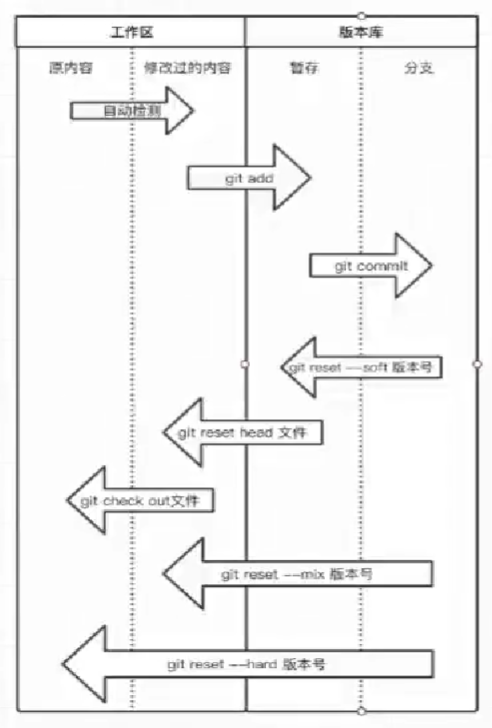

# 2025_07_10
# COPT Python API 函数说明

## 模型初始化
| 函数/方法                | 参数说明                         | 返回值/作用                          |
|--------------------------|----------------------------------|--------------------------------------|
| `Envr()`                 | 无                               | 创建COPT运行环境对象                 |
| `env.createModel(name)`  | `name`: 模型名称(字符串)         | 返回新创建的优化模型对象             |

## 数据定义
| 函数/方法              | 参数说明                          | 返回值/作用                          |
|------------------------|-----------------------------------|--------------------------------------|
| `multidict(dict_data)` | `dict_data`: 输入字典             | 返回分离的键列表和值字典             |
| `tuplelist()`          | 无                                | 创建COPT专用元组列表(支持高效查询)   |

## 变量与约束
| 函数/方法                     | 参数说明                                                                 | 返回值/作用                          |
|-------------------------------|--------------------------------------------------------------------------|--------------------------------------|
| `model.addVars(*indices)`     | `*indices`: 变量维度(如列表、元组)                                       | 返回变量字典                         |
| `model.addConstr(expr)`       | `expr`: 线性表达式(如`x + y <= 10`)                                      | 添加线性约束                         |
| `quicksum(iterable)`          | `iterable`: 可迭代对象                                                   | 返回高效线性求和表达式               |

## 求解与结果
| 函数/方法                | 参数说明                          | 返回值/作用                          |
|--------------------------|-----------------------------------|--------------------------------------|
| `model.setObjective(expr, sense)` | `expr`: 目标函数表达式<br>`sense`: 优化方向(`MINIMIZE/MAXIMIZE`) | 设置目标函数 |
| `model.solve()`          | 无                                | 求解模型                             |
| `model.objval`           | 无                                | 返回最优目标值(求解成功后有效)       |
| `model.getVars()`        | 无                                | 返回所有变量的列表                   |

## 变量属性
| 属性          | 类型     | 说明                              |
|---------------|----------|-----------------------------------|
| `var.name`    | string   | 变量名称                          |
| `var.x`       | float    | 变量最优解值                      |
| `var.basis`   | int      | 基状态(0=非基,1=基,2=上界等)      |

## 辅助函数与工具
| 函数/工具               | 说明                              |
|--------------------|----------------------------------------|
| `itertools.product()`    | Python 标准库函数，生成笛卡尔积（用于组合 origins 和 destination）。                          |
| `dict(zip(keys, values))`       | Python 内置方法，将两个列表组合成字典（用于构建 cost 字典）。                      |


## 代码示例
```python
# 创建模型
model = env.createModel("transportation")

# 添加变量
x = model.addVars(origins, destination)

# 添加约束
model.addConstr(quicksum(x[o,d] for d in destination) <= output[o])

# 求解与输出
model.solve()

if model.status == COPT.OPTIMAL:
    
    print(f"最优值: {model.objval:.2f}")
    
    for v in model.getVars():
        
        print(f"{v.name}: {v.x:.0f}")

# 2025_07_11


## 3. `pd.read_csv(filepath, dtype)`
**用法**:  
`sudoku_init = pd.read_csv("data\sudoku1.csv", dtype=int)`

**功能**:  
从 CSV 文件读取数据，并将其加载为 Pandas 数据框。参数 `dtype=int` 指定所有数据类型为整型。

---

## 4. `np.zeros(shape, dtype)`
**用法**:  
`sudoku_board = np.zeros([9, 9], dtype=int)`

**功能**:  
创建一个给定形状的 NumPy 数组，初始值为零，数据类型为整型。

---

## 5. `iterrows()`
**用法**:  
`for index, r in sudoku_init.iterrows():`

**功能**:  
迭代 Pandas 数据框的每一行，返回行索引 `index` 和行内容 `r`。

---

## 6. `addVars(dimensions, vtype)`
**用法**:  
`x = model.addVars(9, 9, 9, vtype=COPT.BINARY)`

**功能**:  
向模型中添加决策变量。  
- `dimensions`: 决策变量的维度（如 9×9×9）。  
- `vtype`: 决策变量的类型。`COPT.BINARY` 表示二元变量。

---

## 9. `x.sum(dimensions)`
**用法**:  
`x.sum(range(3*i, 3*i+3), range(3*j, 3*j+3), num) == 1`

**功能**:  
对多维变量数组在指定范围内进行求和。